# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [98]:
df1 = pd.read_csv('geo_data_0.csv')
df2 = pd.read_csv('geo_data_1.csv')
df3 = pd.read_csv('geo_data_2.csv')

In [100]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Ознакомимся с данными каждого датасета, проверим на наличие дубликатов, пропусков, посмотрим корреляции

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB


In [102]:
df1.duplicated().sum()

0

In [103]:
df1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [104]:
corr1 = df1.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,f0,f1,f2,product
f0,1.00,-0.44,-0.00,0.14
f1,-0.44,1.00,0.00,-0.19
f2,-0.00,0.00,1.00,0.48
product,0.14,-0.19,0.48,1.00


In [105]:
df1.nunique()

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Распределение значений и выбросы

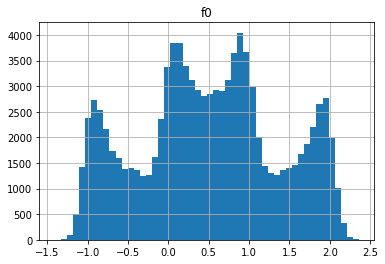

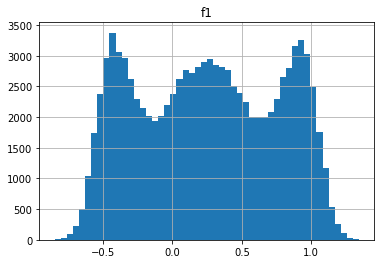

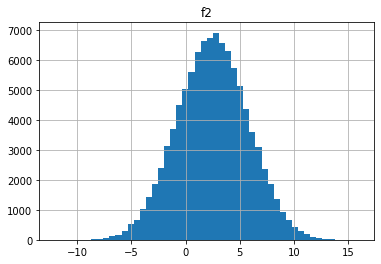

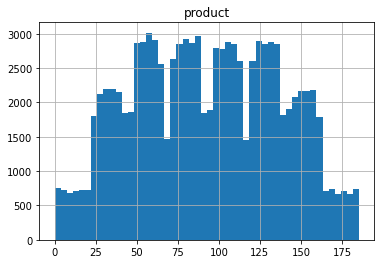

In [106]:
for column in df1[['f0', 'f1', 'f2', 'product']]:
    df1.hist(column, bins=50)

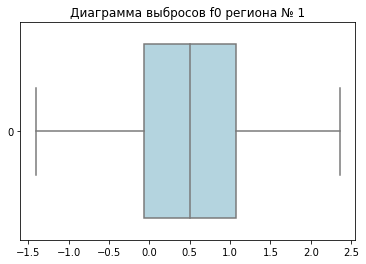

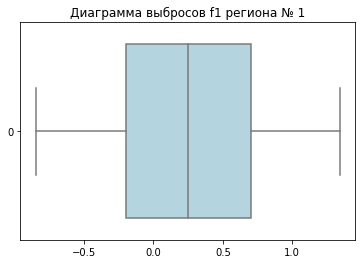

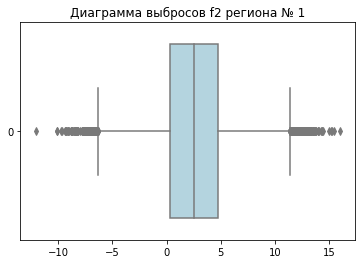

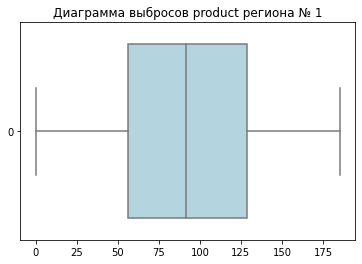

In [107]:
for column in ['f0', 'f1', 'f2', 'product']:
    ax = sns.boxplot(data=df1[column], orient='h', color='lightblue')
    ax.set_title(f'Диаграмма выбросов {column} региона № 1')
    plt.show()

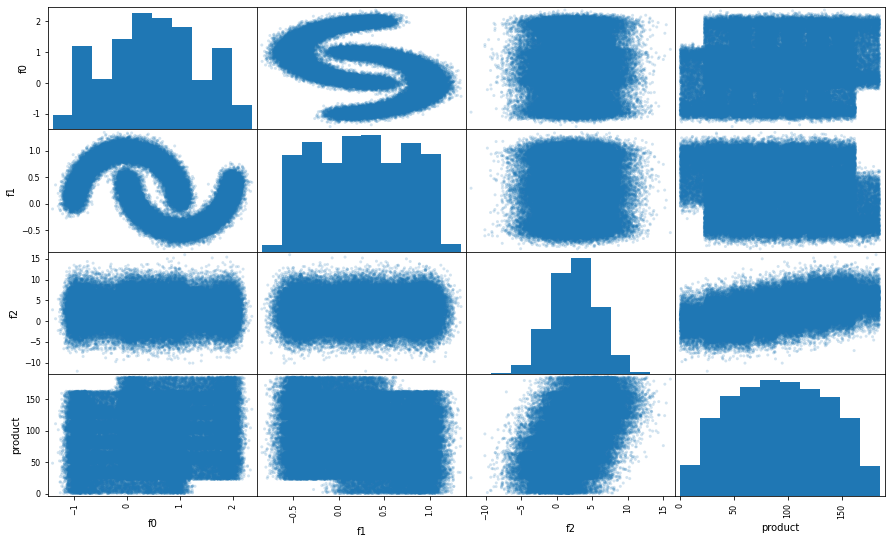

In [108]:
pd.plotting.scatter_matrix(df1, alpha=0.2, figsize=(15, 9))
plt.show()

In [109]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB


In [111]:
df2.duplicated().sum()

0

In [112]:
df2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [113]:
corr2 = df2.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

,f0,f1,f2,product
f0,1.00,0.18,-0.00,-0.03
f1,0.18,1.00,-0.00,-0.01
f2,-0.00,-0.00,1.00,1.00
product,-0.03,-0.01,1.00,1.00


In [114]:
df2.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

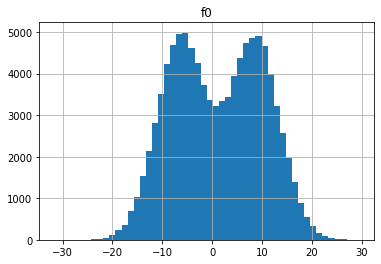

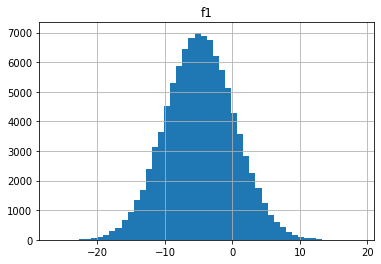

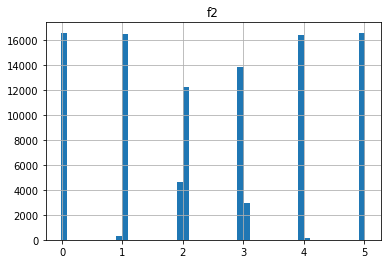

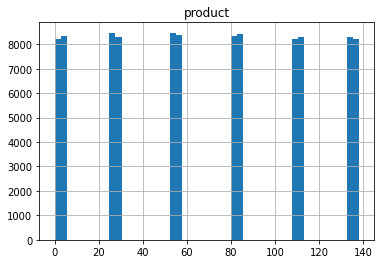

In [115]:
for column in df2[['f0', 'f1', 'f2', 'product']]:
    df2.hist(column, bins=50)

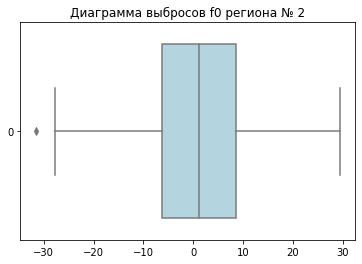

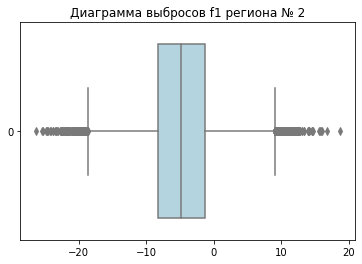

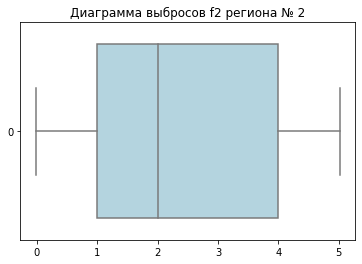

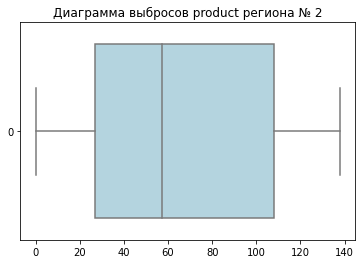

In [116]:
for column in ['f0', 'f1', 'f2', 'product']:
    ax = sns.boxplot(data=df2[column], orient='h', color='lightblue')
    ax.set_title(f'Диаграмма выбросов {column} региона № 2')
    plt.show()

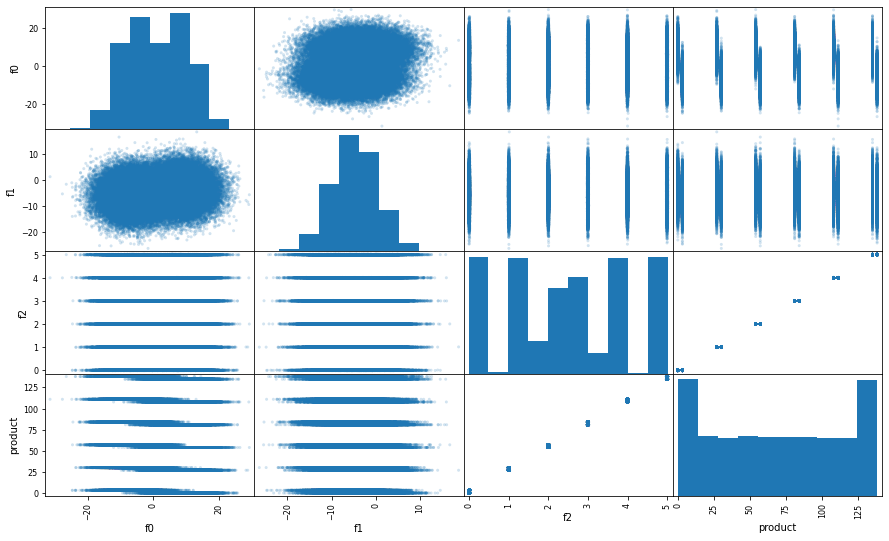

In [117]:
pd.plotting.scatter_matrix(df2, alpha=0.2, figsize=(15, 9))
plt.show()

In [118]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [119]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB


In [120]:
df3.duplicated().sum()

0

In [121]:
df3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [122]:
corr3 = df3.corr()
corr3.style.background_gradient(cmap='coolwarm').set_precision(2)

,f0,f1,f2,product
f0,1.00,0.00,-0.00,-0.00
f1,0.00,1.00,0.00,-0.00
f2,-0.00,0.00,1.00,0.45
product,-0.00,-0.00,0.45,1.00


In [123]:
df3.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

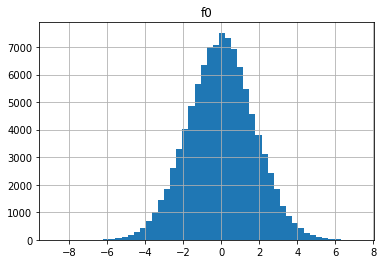

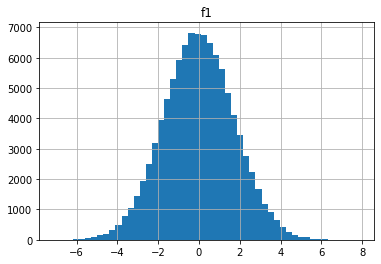

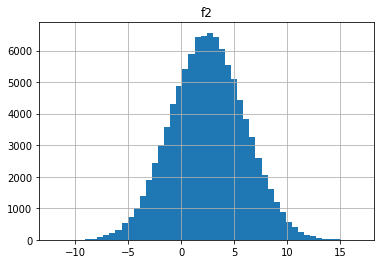

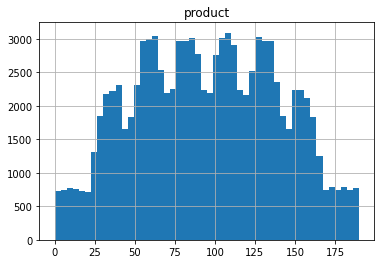

In [124]:
for column in df3[['f0', 'f1', 'f2', 'product']]:
    df3.hist(column, bins=50)

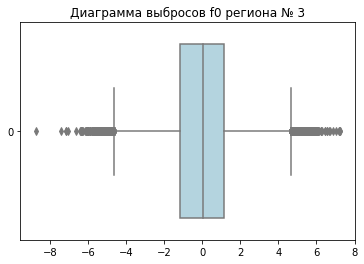

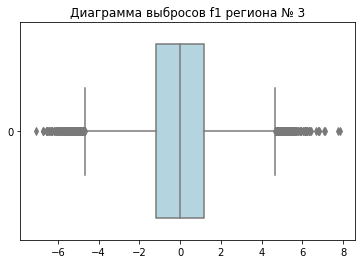

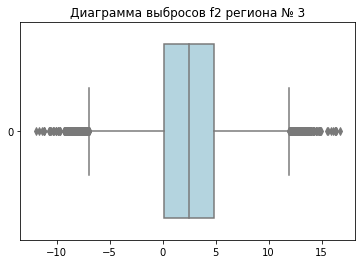

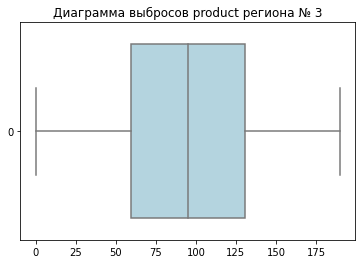

In [125]:
for column in ['f0', 'f1', 'f2', 'product']:
    ax = sns.boxplot(data=df3[column], orient='h', color='lightblue')
    ax.set_title(f'Диаграмма выбросов {column} региона № 3')
    plt.show()

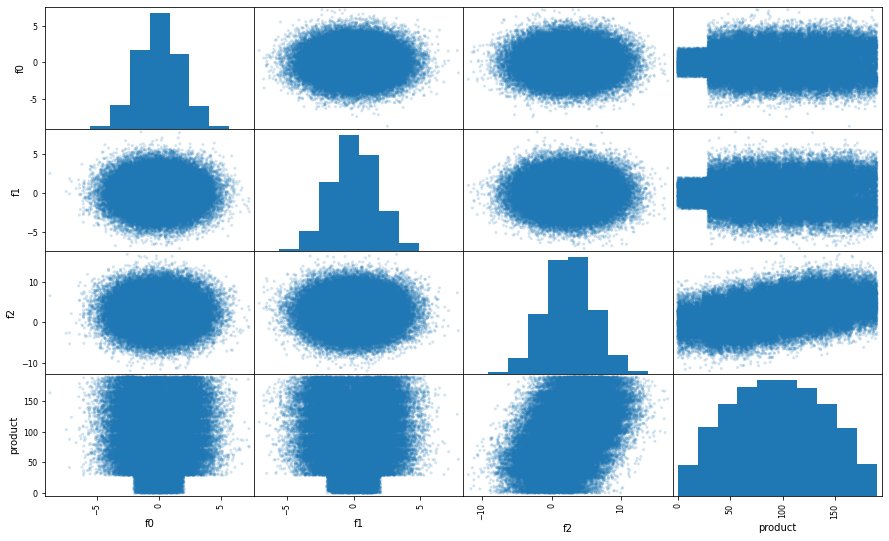

In [126]:
pd.plotting.scatter_matrix(df3, alpha=0.2, figsize=(15, 9))
plt.show()

#### Вывод
Каждый датасет имеет по 100000 записей, данные структурированны, пропуски и дубликаты отсутствуют. Наблюдается сильная корреляция признаков *product* & *f2*.<br/><br/>
Отличительные моменты:<br/>
- в первой датасете *уникальных id*: **99990**, во втором: **99996**, в третьем: **99996**
- во втором датасете *у признака product* всего **12** уникальных значений

## Обучение и проверка модели

Определим *признаки* и *целевой признак*, разделим выборки на **обучающую и валидационную**

In [127]:
features_1 = df1[['f0', 'f1', 'f2']]
target_1 = df1['product']
features_2 = df2[['f0', 'f1', 'f2']]
target_2 = df2['product']
features_3 = df3[['f0', 'f1', 'f2']]
target_3 = df3['product']

Обучим **модель линейной регрессии** для каждого региона добычи и выясним **средний запас предсказанного сырья и RMSE**

In [128]:
def train_model(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features_1, target_1, test_size=0.25, random_state=12345)
    print('Размер обучающей выборки:', features_1_train.shape)
    print('Размер валидационной выборки:', features_1_valid.shape)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predict = model.predict(features_valid)

    predict_mean = predict.mean()
    mse = mean_squared_error(target_valid, predict)
    rmse = mse ** 0.5
    print()
    print('DF1')
    print()
    print('Предсказанный средний запас сырья:',predict_mean)
    print('Фактический средний запас сырья:',target_valid.mean())
    print('MSE модели:',mse)
    print('RMSE модели:',rmse)
#     yield features_train
#     yield features_valid
#     yield target_train
#     yield target_valid
#     yield model
#     yield predict
#     yield predict_mean
#     yield mse
#     yield rmse
    return features_train, features_valid, target_train, target_valid, model, predict, predict_mean, mse, rmse

In [129]:
def plot_model(target_valid, predict, region):
    plt.figure(figsize=(12,8))
    sns.distplot(target_valid, bins=100, hist_kws={'alpha':0.8}, color = 'lightgreen', label = "Объем", kde=False)
    sns.distplot(predict, bins=100, hist_kws={'alpha':0.5}, color = 'green', label = "Предсказание", kde=False)    
    
    plt.title('Распределение скважин по запасам DF1')
    plt.xlabel('Объем запасов нефти в скважине')
    plt.ylabel("Количество скважин")
    plt.legend()
    plt.show()

In [130]:
#features_train_1, features_valid_1, target_train_1, target_valid_1, model_1, predict_1, predict_mean_1, mse_1, rmse_1 = train_model(features_1, target_1)

In [131]:
#plot_model(target_1_valid, predict_1, 'DF1')

In [132]:
features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(features_1, target_1, test_size=0.25, random_state=12345)
print('Размер обучающей выборки:', features_1_train.shape)
print('Размер валидационной выборки:', features_1_valid.shape)

model_1 = LinearRegression()
model_1.fit(features_1_train, target_1_train)
predict_1 = model_1.predict(features_1_valid)

predict_mean_1 = predict_1.mean()
mse_1 = mean_squared_error(target_1_valid, predict_1)
rmse_1 = mse_1 ** 0.5
print()
print('DF1')
print()
print('Предсказанный средний запас сырья:',predict_mean_1)
print('Фактический средний запас сырья:',target_1_valid.mean())
print('MSE модели:',mse_1)
print('RMSE модели:',rmse_1)

Размер обучающей выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)

DF1

Предсказанный средний запас сырья: 92.59256778438035
Фактический средний запас сырья: 92.07859674082927
MSE модели: 1412.2129364399243
RMSE модели: 37.5794217150813


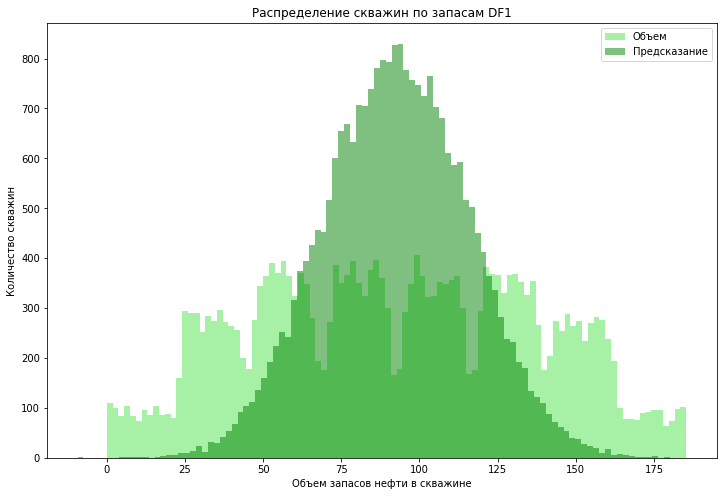

In [133]:
plt.figure(figsize=(12,8))
sns.distplot(target_1_valid, bins=100, hist_kws={'alpha':0.8}, color = 'lightgreen', label = "Объем", kde=False)
sns.distplot(predict_1, bins=100, hist_kws={'alpha':0.5}, color = 'green', label = "Предсказание", kde=False)    
    
plt.title('Распределение скважин по запасам DF1')
plt.xlabel('Объем запасов нефти в скважине')
plt.ylabel("Количество скважин")
plt.legend()
plt.show()

In [134]:
features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(features_2, target_2, test_size=0.25, random_state=12345)
print('Размер обучающей выборки:', features_2_train.shape)
print('Размер валидационной выборки:', features_2_valid.shape)
    
model_2 = LinearRegression()
model_2.fit(features_2_train, target_2_train)
predict_2 = model_2.predict(features_2_valid)

predict_mean_2 = predict_2.mean()
mse_2 = mean_squared_error(target_2_valid, predict_2)
rmse_2 =  mse_2 ** 0.5
print()
print('DF2')
print()
print('Предсказанный средний запас сырья:',predict_mean_2)
print('Фактический средний запас сырья:',target_2_valid.mean())
print('MSE модели:',mse_2)
print('RMSE модели:',rmse_2)

Размер обучающей выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)

DF2

Предсказанный средний запас сырья: 68.728546895446
Фактический средний запас сырья: 68.72313602435997
MSE модели: 0.7976263360391116
RMSE модели: 0.8930992867756147


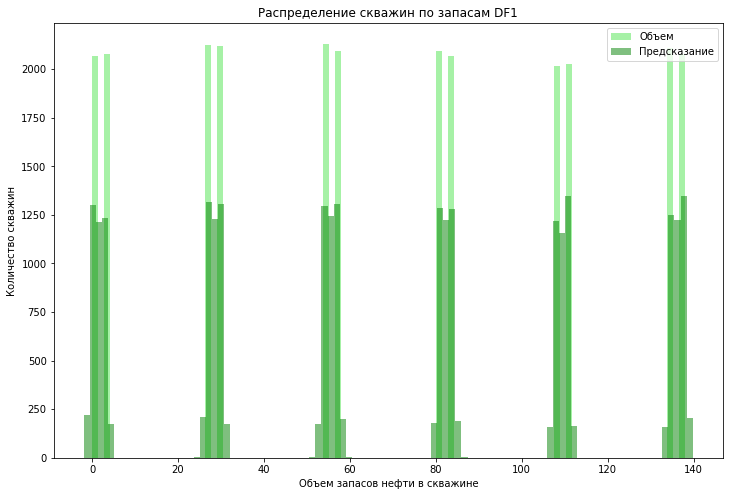

In [135]:
plt.figure(figsize=(12,8))
sns.distplot(target_2_valid, bins=100, hist_kws={'alpha':0.8}, color = 'lightgreen', label = "Объем", kde=False)
sns.distplot(predict_2, bins=100, hist_kws={'alpha':0.5}, color = 'green', label = "Предсказание", kde=False)    
    
plt.title('Распределение скважин по запасам DF1')
plt.xlabel('Объем запасов нефти в скважине')
plt.ylabel("Количество скважин")
plt.legend()
plt.show()

In [136]:
features_3_train, features_3_valid, target_3_train, target_3_valid = train_test_split(features_3, target_3, test_size=0.25, random_state=12345)
print('Размер обучающей выборки:', features_3_train.shape)
print('Размер валидационной выборки:', features_3_valid.shape)
    
model_3 = LinearRegression()
model_3.fit(features_3_train, target_3_train)
predict_3 = model_3.predict(features_3_valid)

predict_mean_3 = predict_3.mean()
mse_3 = mean_squared_error(target_3_valid, predict_3)
rmse_3 = mse_3 ** 0.5
print()
print('DF3')
print()
print('Предсказанный средний запас сырья:',predict_mean_3)
print('Фактический средний запас сырья:',target_3_valid.mean())
print('MSE модели:',mse_3)
print('RMSE модели:',rmse_3)

Размер обучающей выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)

DF3

Предсказанный средний запас сырья: 94.96504596800489
Фактический средний запас сырья: 94.88423280885438
MSE модели: 1602.3775813236196
RMSE модели: 40.02970873393434


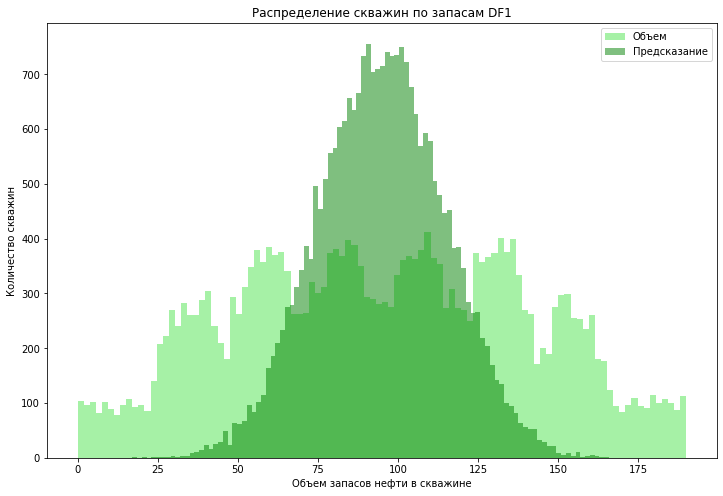

In [137]:
plt.figure(figsize=(12,8))
sns.distplot(target_3_valid, bins=100, hist_kws={'alpha':0.8}, color = 'lightgreen', label = "Объем", kde=False)
sns.distplot(predict_3, bins=100, hist_kws={'alpha':0.5}, color = 'green', label = "Предсказание", kde=False)    
    
plt.title('Распределение скважин по запасам DF1')
plt.xlabel('Объем запасов нефти в скважине')
plt.ylabel("Количество скважин")
plt.legend()
plt.show()

#### Вывод
Во всех регионах мы наблюдаем близкий к истинному среднему, средний запас сырья. Для регионов 1 и 3 характерен достаточно **высокий уровень RMSE**, ~ **37-40**. Наименьшим RMSE может похвастаться модель региона 2, что говорит о большей точности обученной модели. Однако, это может быть вызвано тем фактором, что у признака product всего 12 записей, в то время, как у конкурентов по 100000. Соответственно, сама модель и имеет меньшую склонность ошибаться.

## Подготовка к расчёту прибыли

Исходя из условий задачи, бюджет на регион составляет 10 млрд рублей, доход с одного барреля 450 рублей, при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [138]:
costs = 10000000000
best_wells, all_wells = 200, 500
profit_per_barrel = 450000

In [139]:
min_product = costs / (best_wells * profit_per_barrel)
print('Достаточный объём сырья для безубыточной разработки новой скважины:',min_product)

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111


#### Вывод
Для безуботочной разработки новой скважины, потребуется минимум 111.11 тыс. баррелей нефти, ни один регион не имеет данного объема фактического среднего запаса сырья.

## Расчёт прибыли и рисков 

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

На случай повторения индексов, осуществим их сброс

In [140]:
target_1_valid = pd.Series(target_1_valid).reset_index(drop=True)
target_2_valid = pd.Series(target_2_valid).reset_index(drop=True)
target_3_valid = pd.Series(target_3_valid).reset_index(drop=True)

In [141]:
predict_1 = pd.Series(predict_1).reset_index(drop=True)
predict_2 = pd.Series(predict_2).reset_index(drop=True)
predict_3 = pd.Series(predict_3).reset_index(drop=True)

In [142]:
def calc_profit(target, predict, count_wells, print_res=True):
    # Получим лучшие скважины на основе предсказаний
    wells_top = predict.sort_values(ascending=False)
    # Получим реальные значения объемов запасов для лучших скважин
    target_top = target.loc[wells_top.index][:count_wells]
    # Получим средний запас сырья по скважинам с максимальным показателем
    top_wells_mean = target_top.mean()
    # Посчитаем суммарные запасы лучших скважин
    wells_sum = target_top.sum()
    # Определим прибыль с учетом бюджета и стоимости одной тысячи баррелей нефти
    profit = (wells_sum * profit_per_barrel - costs) / 1_000_000_000
    if print_res:
        print('Средний запас сырья среди скважин с максимальным показателем: {:.2f} тыс. баррелей'.format(top_wells_mean))
        print('Суммарный целевой объем сырья: {:.2f} тыс. баррелей'.format(wells_sum))
        print('Прибыль для полученного объёма сырья: {:.3f} млрд. руб'.format(profit))
    return profit

In [144]:
print('Регион 1:')
revenue_1 = calc_profit(target_1_valid, predict_1, best_wells)
print()
print('Регион 2:')
revenue_2 = calc_profit(target_2_valid, predict_2, best_wells)
print()
print('Регион 3:')
revenue_3 = calc_profit(target_3_valid, predict_3, best_wells)
print()

Регион 1:
Средний запас сырья среди скважин с максимальным показателем: 148.01 тыс. баррелей
Суммарный целевой объем сырья: 29601.84 тыс. баррелей
Прибыль для полученного объёма сырья: 3.321 млрд. руб

Регион 2:
Средний запас сырья среди скважин с максимальным показателем: 137.95 тыс. баррелей
Суммарный целевой объем сырья: 27589.08 тыс. баррелей
Прибыль для полученного объёма сырья: 2.415 млрд. руб

Регион 3:
Средний запас сырья среди скважин с максимальным показателем: 141.23 тыс. баррелей
Суммарный целевой объем сырья: 28245.22 тыс. баррелей
Прибыль для полученного объёма сырья: 2.710 млрд. руб



Применим технику bootstrap для 1000 выборок для определения распределения прибыли по каждому региону

In [145]:
state = np.random.RandomState(12345)

def calc_risk(target, predictions, region):
    # Создаем list для хранения прибыли
    values = []
    for _ in range(1000):
        # Возьмем 500 скважин из региона, переменная all_wells
        predict_b = predictions.sample(n=all_wells, replace=True, random_state=state)
        # Получим истинные значения для выбранных скважин
        target_b = target.loc[predict_b.index]
        # Кладем значения прибыли из предыдущей функции в наш list
        values.append(calc_profit(target_b, predict_b, best_wells, False))

    values = pd.Series(values)
    values_mean = values.mean()
    # Рассчитаем 95% доверительный интервал
    conf_interval = 0.05
    interval_left = values.quantile(conf_interval / 2)
    interval_right = values.quantile(1 - conf_interval / 2)  
    # Рассчитаем вероятность убытка
    loss_rate = (values < 0).mean()
   
    print('Средняя прибыль = {:.3f} млрд. руб.'.format(values_mean))
    print('Доверительный интервал 95% = [{:.3f}, {:.3f}]'.format(interval_left, interval_right))
    print('Вероятность получить убыток равна {:.1%}'.format(loss_rate))
    return values

In [146]:
print('Регион 1:')
revenue_1 = calc_risk(target_1_valid, predict_1, 'Первый регион')
print()
print('Регион 2:')
revenue_2 = calc_risk(target_2_valid, predict_2, 'Второй регион')
print()
print('Регион 3:')
revenue_3 = calc_risk(target_3_valid, predict_3, 'Третий регион')
print()

Регион 1:
Средняя прибыль = 0.426 млрд. руб.
Доверительный интервал 95% = [-0.102, 0.948]
Вероятность получить убыток равна 6.0%

Регион 2:
Средняя прибыль = 0.518 млрд. руб.
Доверительный интервал 95% = [0.128, 0.954]
Вероятность получить убыток равна 0.3%

Регион 3:
Средняя прибыль = 0.420 млрд. руб.
Доверительный интервал 95% = [-0.116, 0.990]
Вероятность получить убыток равна 6.2%



#### Вывод
1) Средний запас сырья по в расчете на одну скважину по каждому региону (**148.01, 137.95, 141.23**) превышает рассчитанный минимально необходимый, **111.11**. Максимально рентабельной выглядит разработка первого региона, минимально - второго.<br/>
2) С точки зрения вероятности получить убыток, наиболее предпочтительно показывает себя Регион 2, всего **0.3%**, средняя прибыль рассчитана, как **0.518** млрд рублей.